# Tip prediction using Linear Regression
**Objective** :
- Linear Regression model from `tips` dataset with `total_bill` as feature and `tip` as target
- Error Analysis
- Error Distribution with Histogram

---

## Load package

In [41]:
## Import necessary package 
import sklearn
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [42]:
## Load the tips dataset
df_tips = sns.load_dataset('tips')

In [43]:
## Preview the tips dataset
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
## Create dataframe from total_bill and tip column subset
df_tips_subset_billtip = df_tips[['total_bill','tip']]

In [45]:
## Preview the new dataframe
df_tips_subset_billtip.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


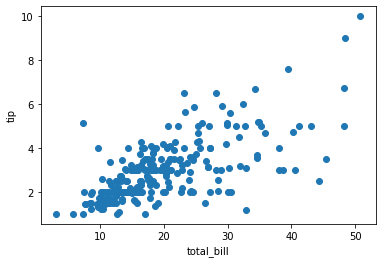

In [46]:
## Visualize the relation between total_bill and tip
plt.scatter(df_tips_subset_billtip['total_bill'],df_tips_subset_billtip['tip'])
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.show()

In [47]:
## Show correlation between total_bill and tip
df_tips_subset_billtip.corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


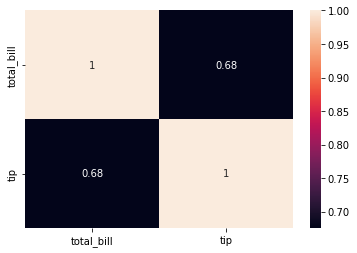

In [48]:
sns.heatmap(df_tips_subset_billtip.corr(), annot=True)
plt.show()

---

## Linear Regression Model

In [49]:
from sklearn import linear_model


In [50]:
## Create model for linear regression
Model = linear_model.LinearRegression()

In [51]:
## Set the Feature and Target column
x=df_tips_subset_billtip[['total_bill']] # Feature
y=df_tips_subset_billtip['tip'] # Target

In [52]:
## Fit Feature and Target to train model
Model.fit(x,y)

LinearRegression()

In [53]:
## Run prediction with trained model using existing total_bill data
Model.predict(x)

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

In [54]:
## Add new column tip_prediction 
df_tips_subset_billtip['tip_prediction']=Model.predict(x)

In [55]:
## Add new column Error
df_tips_subset_billtip['Error']=abs(df_tips_subset_billtip['tip_prediction']-df_tips_subset_billtip['tip'])

In [56]:
df_tips_subset_billtip

,total_bill,tip,tip_prediction,Error
0,16.99,1.01,2.704636,1.694636
1,10.34,1.66,2.006223,0.346223
2,21.01,3.50,3.126835,0.373165
3,23.68,3.31,3.407250,0.097250
4,24.59,3.61,3.502822,0.107178
...,...,...,...,...
239,29.03,5.92,3.969131,1.950869
240,27.18,2.00,3.774836,1.774836
241,22.67,2.00,3.301175,1.301175
242,17.82,1.75,2.791807,1.041807


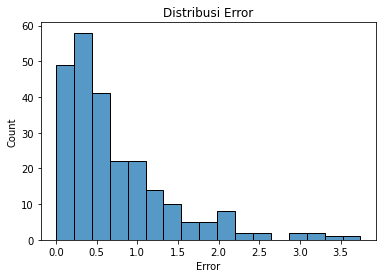

In [57]:
## Create Error Distribution visualization with Histogram
sns.histplot(df_tips_subset_billtip['Error'])
plt.xlabel('Error')
plt.title('Distribusi Error')
plt.show()

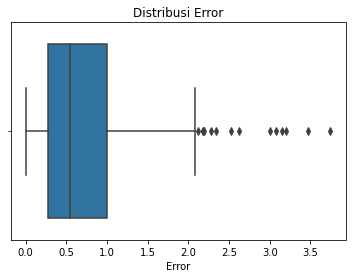

In [58]:
## Create Error Distribution visualization with Box Plot
sns.boxplot(df_tips_subset_billtip['Error'])
plt.xlabel('Error')
plt.title('Distribusi Error')
plt.show()